<a href="https://colab.research.google.com/github/Cal-0/Cal-0-dashboard.github.io/blob/master/Build_Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import the tools you will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Install so the notebook can navigate Kaggle
!pip install kaggle

In [4]:
# Upload your user authentication from your local files
# The user scraped the data himself and I don't have permission to repuload it 
# on github. This is Kaggles solution.
# You have to upload your Kaggle accounts API token to source the dataset
# this link shows how https://www.youtube.com/watch?v=eEgZtNOCJhk&t=82s
# explanation starts at 1:10
# the file should read kaggle.json as default
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cal456","key":"36f580691299d63624dfae02b9dbbffc"}'}

In [0]:
# Direct the notebook to the dataset on kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# Downloads the zip file from the kaggle website to the notebook
!kaggle datasets download -d kemical/kickstarter-projects

 68% 25.0M/36.8M [00:00<00:00, 38.2MB/s]
100% 36.8M/36.8M [00:00<00:00, 57.9MB/s]


In [7]:
# Seperate the different Excel files into CSVs
!unzip kickstarter-projects.zip

Archive:  kickstarter-projects.zip
  inflating: ks-projects-201612.csv  
  inflating: ks-projects-201801.csv  


In [0]:
# Take the seperated CSVs and turn them into Pandas dataframes
prj1 = pd.read_csv('ks-projects-201612.csv',header=0,encoding = 'iso-8859-1')
prj2 = pd.read_csv('ks-projects-201801.csv',header=0,encoding = 'iso-8859-1')

In [53]:
# Show the head of each dataframe in order to isloate what
# columns we want in our final dataframe
prj1.head().T

,0,1,2,3,4
ID,1000002330,1000004038,1000007540,1000011046,1000014025
name,The Songs of Adelaide & Abullah,Where is Hank?,ToshiCapital Rekordz Needs Help to Complete Album,Community Film Project: The Art of Neighborhoo...,Monarch Espresso Bar
category,Poetry,Narrative Film,Music,Film & Video,Restaurants
main_category,Publishing,Film & Video,Music,Film & Video,Food
currency,GBP,USD,USD,USD,USD
deadline,2015-10-09 11:36:00,2013-02-26 00:20:50,2012-04-16 04:24:11,2015-08-29 01:00:00,2016-04-01 13:38:27
goal,1000,45000,5000,19500,50000
launched,2015-08-11 12:12:28,2013-01-12 00:20:50,2012-03-17 03:24:11,2015-07-04 08:35:03,2016-02-26 13:38:27
pledged,0,220,1,1283,52375
state,failed,failed,failed,canceled,successful


In [54]:
prj2.head().T

,0,1,2,3,4
ID,1000002330,1000003930,1000004038,1000007540,1000011046
name,The Songs of Adelaide & Abullah,Greeting From Earth: ZGAC Arts Capsule For ET,Where is Hank?,ToshiCapital Rekordz Needs Help to Complete Album,Community Film Project: The Art of Neighborhoo...
category,Poetry,Narrative Film,Narrative Film,Music,Film & Video
main_category,Publishing,Film & Video,Film & Video,Music,Film & Video
currency,GBP,USD,USD,USD,USD
deadline,2015-10-09,2017-11-01,2013-02-26,2012-04-16,2015-08-29
goal,1000,30000,45000,5000,19500
launched,2015-08-11 12:12:28,2017-09-02 04:43:57,2013-01-12 00:20:50,2012-03-17 03:24:11,2015-07-04 08:35:03
pledged,0,2421,220,1,1283
state,failed,failed,failed,failed,canceled


In [0]:
# From the prj1 df we do not want 
# the unamed columns, so we drop them
prj1_2 = prj1.drop(prj1.columns[[13,14,15,16]], axis=1)

In [56]:
# Double check
prj1_2.head().T

,0,1,2,3,4
ID,1000002330,1000004038,1000007540,1000011046,1000014025
name,The Songs of Adelaide & Abullah,Where is Hank?,ToshiCapital Rekordz Needs Help to Complete Album,Community Film Project: The Art of Neighborhoo...,Monarch Espresso Bar
category,Poetry,Narrative Film,Music,Film & Video,Restaurants
main_category,Publishing,Film & Video,Music,Film & Video,Food
currency,GBP,USD,USD,USD,USD
deadline,2015-10-09 11:36:00,2013-02-26 00:20:50,2012-04-16 04:24:11,2015-08-29 01:00:00,2016-04-01 13:38:27
goal,1000,45000,5000,19500,50000
launched,2015-08-11 12:12:28,2013-01-12 00:20:50,2012-03-17 03:24:11,2015-07-04 08:35:03,2016-02-26 13:38:27
pledged,0,220,1,1283,52375
state,failed,failed,failed,canceled,successful


In [0]:
# From the prj2 df we do not want 
# the redundant columns that could cause leakage, so we drop them
prj2_2 = prj2.drop(prj2.columns[[13,14]], axis=1)

In [58]:
# double check
prj2_2.head().T

,0,1,2,3,4
ID,1000002330,1000003930,1000004038,1000007540,1000011046
name,The Songs of Adelaide & Abullah,Greeting From Earth: ZGAC Arts Capsule For ET,Where is Hank?,ToshiCapital Rekordz Needs Help to Complete Album,Community Film Project: The Art of Neighborhoo...
category,Poetry,Narrative Film,Narrative Film,Music,Film & Video
main_category,Publishing,Film & Video,Film & Video,Music,Film & Video
currency,GBP,USD,USD,USD,USD
deadline,2015-10-09,2017-11-01,2013-02-26,2012-04-16,2015-08-29
goal,1000,30000,45000,5000,19500
launched,2015-08-11 12:12:28,2017-09-02 04:43:57,2013-01-12 00:20:50,2012-03-17 03:24:11,2015-07-04 08:35:03
pledged,0,2421,220,1,1283
state,failed,failed,failed,failed,canceled


In [59]:
# check shapes
print (prj1_2.shape)
prj2_2.shape

(323750, 13)


(378661, 13)

In [0]:
# Will work with prj2 for classification
# relabel for convenience
df = prj2_2

In [61]:
# State will be our target
df['state'].value_counts(normalize=True)

failed        0.522153
successful    0.353762
canceled      0.102411
undefined     0.009407
live          0.007392
suspended     0.004875
Name: state, dtype: float64

In [0]:
# live results will be inconclusive
# cancelled projects have too many extraneous variables around them
# can't draw conclusive evidence from undefined/suspended projects
# will filter these out in favor of a failed/successful binary
df2 = df[(df['state'] != 'canceled') & (df['state'] != 'undefined')
& (df['state'] != 'live') & (df['state'] != 'suspended')]

In [63]:
# double check
df2['state'].value_counts(normalize=True)

failed        0.596123
successful    0.403877
Name: state, dtype: float64

In [0]:
# Will want the same split for linear problem
# split begins here

In [0]:
# Classification

In [66]:
# Install the tools
!pip install category_encoders
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

In [0]:
# My majority class frequency is within the range so I will use accuracy as my metric.
# I will test on the sperate dataframe and will use a date/time split to use on my validation split.

In [68]:
df2.head().T

,0,1,2,3,5
ID,1000002330,1000003930,1000004038,1000007540,1000014025
name,The Songs of Adelaide & Abullah,Greeting From Earth: ZGAC Arts Capsule For ET,Where is Hank?,ToshiCapital Rekordz Needs Help to Complete Album,Monarch Espresso Bar
category,Poetry,Narrative Film,Narrative Film,Music,Restaurants
main_category,Publishing,Film & Video,Film & Video,Music,Food
currency,GBP,USD,USD,USD,USD
deadline,2015-10-09,2017-11-01,2013-02-26,2012-04-16,2016-04-01
goal,1000,30000,45000,5000,50000
launched,2015-08-11 12:12:28,2017-09-02 04:43:57,2013-01-12 00:20:50,2012-03-17 03:24:11,2016-02-26 13:38:27
pledged,0,2421,220,1,52375
state,failed,failed,failed,failed,successful


In [0]:
# drop columns that could lead to leakage
df3 = df2.drop(prj2.columns[[8,10,12]], axis=1)

In [71]:
# double check
df3.head().T

,0,1,2,3,5
ID,1000002330,1000003930,1000004038,1000007540,1000014025
name,The Songs of Adelaide & Abullah,Greeting From Earth: ZGAC Arts Capsule For ET,Where is Hank?,ToshiCapital Rekordz Needs Help to Complete Album,Monarch Espresso Bar
category,Poetry,Narrative Film,Narrative Film,Music,Restaurants
main_category,Publishing,Film & Video,Film & Video,Music,Food
currency,GBP,USD,USD,USD,USD
deadline,2015-10-09,2017-11-01,2013-02-26,2012-04-16,2016-04-01
goal,1000,30000,45000,5000,50000
launched,2015-08-11 12:12:28,2017-09-02 04:43:57,2013-01-12 00:20:50,2012-03-17 03:24:11,2016-02-26 13:38:27
state,failed,failed,failed,failed,successful
country,GB,US,US,US,US


In [0]:
# split the train and test set
train = df3[(df3['launched'] < '2017')]
test = df3[(df3['launched'] > '2017')]

In [73]:
print(train.shape)
test.shape

(288256, 10)


(43419, 10)

In [0]:
# create validation set
train, val = train_test_split(train, train_size=0.80, test_size=0.20, random_state=42)

In [0]:
target = 'state'
train_features = train.drop(columns=[target])
numeric_features = train_features.select_dtypes(include='number').columns.tolist()
cardinality = train_features.select_dtypes(exclude='number').nunique()
categorical_features = cardinality[cardinality <= 85].index.tolist()
features = numeric_features + categorical_features
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

In [0]:
from xgboost import XGBClassifier

In [77]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['main_category', 'currency', 'country'],
                                drop_invariant=False, handle_missing='value',
                                handle_unknown='value',
                                mapping=[{'col': 'main_category',
                                          'data_type': dtype('O'),
                                          'mapping': Fashion          1
Theater          2
Art              3
Publishing       4
Games            5
Design           6
Food             7
Film & Video     8
Technology       9
Music           10
Dance           11
Photography     12
Comics          13
Crafts          1...
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3

In [78]:
pipeline.score(X_val, y_val)

0.6510615416637757

In [79]:
pipeline.score(X_test, y_test)

0.6254865381515005

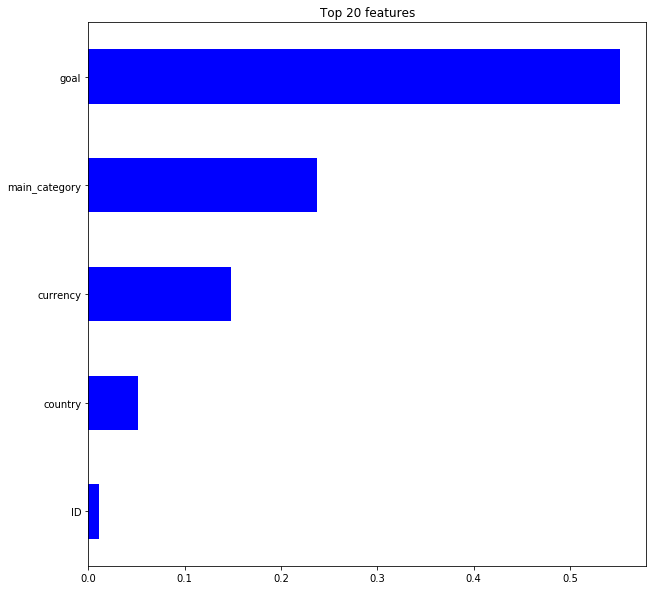

In [80]:
model = pipeline.named_steps['xgbclassifier']
importances = pd.Series(model.feature_importances_, X_train.columns)

%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='blue');

In [0]:
y_pred = pipeline.predict(X_val)

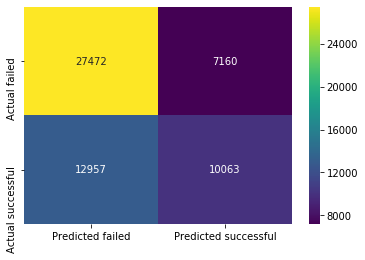

In [82]:
import seaborn as sns
from sklearn.utils.multiclass import unique_labels
unique_labels(y_val)
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred):
    labels = unique_labels(y_true)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_true, y_pred), 
                         columns=columns, index=index)
    return sns.heatmap(table, annot=True, fmt='d', cmap='viridis')

plot_confusion_matrix(y_val, y_pred);

In [83]:
!pip install pdpbox
from pdpbox.pdp import pdp_interact, pdp_interact_plot

In [0]:
from pdpbox.pdp import pdp_isolate, pdp_plot
feature = 'goal'

isolated = pdp_isolate(
    model=pipeline, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature
)

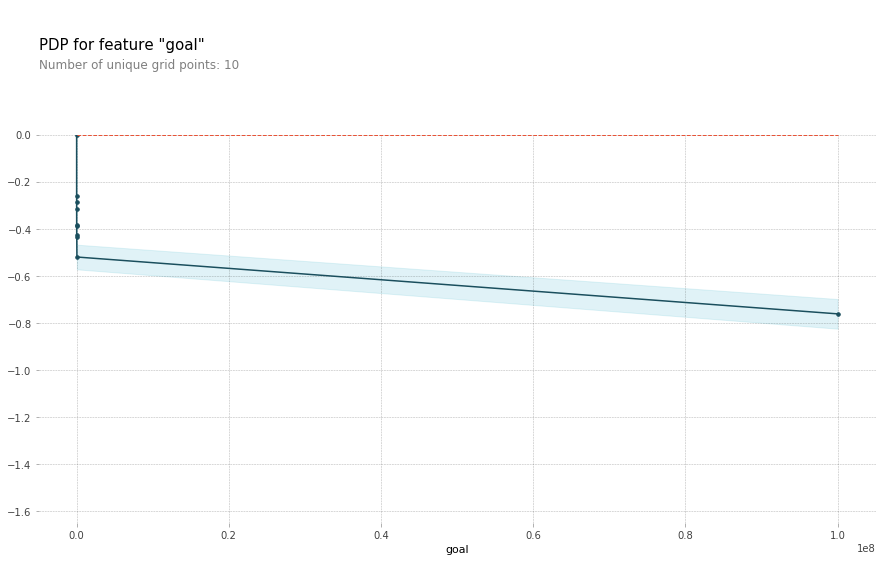

In [85]:
pdp_plot(isolated, feature_name=feature);

In [0]:
# Linear Model

In [0]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression

In [0]:
train2 = df2[(df2['launched'] < '2017')]
test2 = df2[(df2['launched'] > '2017')]

In [0]:
train, val = train_test_split(train2, train_size=0.80, test_size=0.20, random_state=42)

In [0]:
features = ['backers']
target = 'state'
X_train = train2[features]
y_train = train2[target]
X_test = val[features]
y_test = val[target]

In [91]:
model = log_reg(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [92]:
y_pred = model.predict(X_test)
y_pred

array(['failed', 'failed', 'failed', ..., 'failed', 'failed', 'failed'],
      dtype=object)

In [0]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [94]:
model.score(X_test, y_test)

0.793675848192604

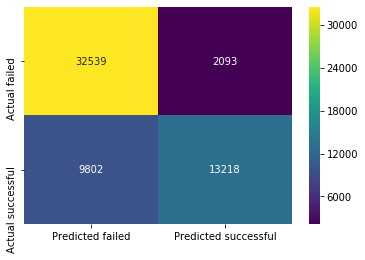

In [95]:
plot_confusion_matrix(y_val, y_pred);